# **Exploratory Data Analysis**

Nuestro problema es de tipo clasificación. El objetivo es predecir si a partir de un terremoto con ciertas características, se producirá un tsunami.

Nuestro target es: **oceanicTsunami**: donde 0 es que no hay tsunami tras el terremoto y 1 es que se produce un tsunami.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv(r'C:\Users\isabe\Documents\Thebridge\Machine learning datasets\CARPETA GITHUB\Data\processed.csv')

In [3]:
df

id  year                  locationName  latitude_eq  longitude_eq  \
0         3 -2000              TURKMENISTAN:  W       38.000        58.200   
1        25  -250        KYRGYZSTAN:  CHIGUCHIN       42.700        77.500   
2        28  -227   GREECE:  DODECANESE ISLANDS       36.300        28.300   
3        38    10           TURKMENISTAN:  NISA       38.000        58.300   
4        55   -63           RUSSIA:  PANTIKAPEY       45.200        36.600   
...     ...   ...                           ...          ...           ...   
3510  10923  2025  RUSSIA:  KAMCHATKA PENINSULA       52.512       160.324   
3511  10924  2025             TURKEY: BALIKESIR       39.312        28.069   
3512  10925  2025         EL SALVADOR-GUATEMALA       14.055       -89.883   
3513  10926  2025   INDONESIA:  SULAWESI:  POSO       -1.282       120.727   
3514  10927  2025          CHILE: DRAKE PASSAGE      -60.186       -61.821   

      damageAmountOrder  publish       country  regionCode_eq  intensity  \
0                   1.0     True  TURKMENISTAN             40       10.0   
1                   3.0     True    KYRGYZSTAN             40        9.0   
2                   1.0     True        GREECE            130       10.0   
3                   3.0     True  TURKMENISTAN             40       10.0   
4                   3.0     True        RUSSIA             40        8.0   
...                 ...      ...           ...            ...        ...   
3510                NaN     True        RUSSIA             50        8.0   
3511                2.0     True        TURKEY            140        NaN   
3512                3.0     True     GUATEMALA            100        NaN   
3513                2.0     True     INDONESIA            170        NaN   
3514                NaN     True    ANTARCTICA             20        NaN   

      deathsAmountOrder  tsunamiEventId  deathsAmountOrderTotal  eqDepth  \
0                   1.0             NaN                     1.0     18.0   
1                   NaN             NaN                     NaN     20.0   
2                   1.0          3092.0                     1.0    100.0   
3                   NaN             NaN                     NaN     18.0   
4                   NaN             NaN                     NaN     20.0   
...                 ...             ...                     ...      ...   
3510                NaN          6044.0                     1.0     35.0   
3511                1.0             NaN                     1.0     10.0   
3512                1.0             NaN                     1.0     10.0   
3513                1.0          6046.0                     1.0      8.0   
3514                NaN          6047.0                     NaN     10.0   

      deaths  housesDestroyedAmountOrder  deathsTotal  damageAmountOrderTotal  \
0        1.0                         1.0          1.0                     1.0   
1        NaN                         NaN          NaN                     3.0   
2        NaN                         1.0          NaN                     1.0   
3        NaN                         NaN          NaN                     NaN   
4        NaN                         NaN          NaN                     3.0   
...      ...                         ...          ...                     ...   
3510     NaN                         NaN          1.0                     2.0   
3511     1.0                         1.0          1.0                     2.0   
3512     1.0                         NaN          1.0                     3.0   
3513     1.0                         1.0          1.0                     2.0   
3514     NaN                         NaN          NaN                     NaN   

      housesDestroyedAmountOrderTotal  month   day  volcanoEventId  \
0                                 1.0    NaN   NaN             NaN   
1                                 NaN    NaN   NaN             NaN   
2                                 1.0    NaN   NaN             

In [4]:
df.isnull().sum()

id                                    0
year                                  0
locationName                          0
latitude_eq                           0
longitude_eq                          0
damageAmountOrder                   843
publish                               0
country                               0
regionCode_eq                         0
intensity                          1889
deathsAmountOrder                  1991
tsunamiEventId                     2445
deathsAmountOrderTotal             2007
eqDepth                               0
deaths                             2073
housesDestroyedAmountOrder         2397
deathsTotal                        2068
damageAmountOrderTotal             1039
housesDestroyedAmountOrderTotal    2365
month                                28
day                                  36
volcanoEventId                     3484
housesDamagedAmountOrder           2557
injuries                           2196
injuriesAmountOrder                2027


In [5]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])
    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])
    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df))
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])
    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])   
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df))
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])
    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)
    return concatenado       
data_report(df)


DATA_TYPE  MISSINGS (%)  UNIQUE_VALUES  \
COL_N                                                                    
id                                  int64           0.0           3515   
year                                int64           0.0            275   
locationName                       object           0.0           2441   
latitude_eq                       float64           0.0           2952   
longitude_eq                      float64           0.0           3173   
damageAmountOrder                 float64          24.0              4   
publish                              bool           0.0              1   
country                            object           0.0            133   
regionCode_eq                       int64           0.0             18   
intensity                         float64          54.0             11   
deathsAmountOrder                 float64          57.0              5   
tsunamiEventId                    float64          70.0           1070   
deathsAmountOrderTotal            float64          57.0              4   
eqDepth                           float64           0.0            206   
deaths                            float64          59.0            312   
housesDestroyedAmountOrder        float64          68.0              5   
deathsTotal                       float64          59.0            329   
damageAmountOrderTotal            float64          30.0              4   
housesDestroyedAmountOrderTotal   float64          67.0              4   
month                             float64           1.0             12   
day                               float64           1.0             31   
volcanoEventId                    float64          99.0             31   
housesDamagedAmountOrder          float64          73.0              4   
injuries                          float64          62.0            372   
injuriesAmountOrder               float64          58.0              4   
injuriesTotal                     float64          62.0            377   
injuriesAmountOrderTotal          float64          57.0              4   
hour                              float64           3.0             24   
housesDamagedAmountOrderTotal     float64          74.0              4   
minute                            float64           4.0             60   
housesDestroyed                   float64          80.0            379   
housesDamaged                     float64          84.0            385   
housesDestroyedTotal              float64          80.0            386   
housesDamagedTotal                float64          85.0            371   
area                               object          94.0             27   
second                            float64           8.0            593   
damageMillionsDollars             float64          83.0            294   
missing                           float64          99.0             19   
missingAmountOrder                float64          99.0              4   
missingTotal                      float64          99.0             21   
missingAmountOrderTotal           float64          99.0              4   
damageMillionsDollarsTotal        float64          83.0            299   
magnitude_Mw                      float64           0.0            150   
MagnitudeSource                    object           9.0              4   
earthquakeEventId                 float64          70.0           1069   
oceanicTsunami                      int64           0.0              2   
maxWaterHeight                    float64          78.0            184   
regionCode_ts                     float64          70.0             19   
latitude_ts                       float64          70.0            965   
longitude_ts                      float64          70.0            983   
same_region                          bool           0.0              2   

                                 CARDIN (%)  
COL_N                                        
id               

In [6]:
df.columns

Index(['id', 'year', 'locationName', 'latitude_eq', 'longitude_eq',
       'damageAmountOrder', 'publish', 'country', 'regionCode_eq', 'intensity',
       'deathsAmountOrder', 'tsunamiEventId', 'deathsAmountOrderTotal',
       'eqDepth', 'deaths', 'housesDestroyedAmountOrder', 'deathsTotal',
       'damageAmountOrderTotal', 'housesDestroyedAmountOrderTotal', 'month',
       'day', 'volcanoEventId', 'housesDamagedAmountOrder', 'injuries',
       'injuriesAmountOrder', 'injuriesTotal', 'injuriesAmountOrderTotal',
       'hour', 'housesDamagedAmountOrderTotal', 'minute', 'housesDestroyed',
       'housesDamaged', 'housesDestroyedTotal', 'housesDamagedTotal', 'area',
       'second', 'damageMillionsDollars', 'missing', 'missingAmountOrder',
       'missingTotal', 'missingAmountOrderTotal', 'damageMillionsDollarsTotal',
       'magnitude_Mw', 'MagnitudeSource', 'earthquakeEventId',
       'oceanicTsunami', 'maxWaterHeight', 'regionCode_ts', 'latitude_ts',
       'longitude_ts', 'same_region

## 0.- ELIMINAR COLUMNAS NO INTERESANTES Y CON MUCHOS HUECOS

A simple vista podemos ver como hay colummnas que debemos eliminar por la gran cantidad de nulos, otras que están fuertemente correlacionadas o que muestran información similar y otras columnas sin interés para nuestro estudio.

In [7]:
#Eliminamos columnas no interesantes, relacionadas con otras o con muchos nulos:

df = df.drop(columns=['locationName','publish','month','day','hour','minute','second','area','id','housesDamagedAmountOrder','earthquakeEventId','volcanoEventId','tsunamiEventId','housesDestroyedAmountOrder', 'missingAmountOrder','missingTotal','missing','missingAmountOrderTotal','deaths','injuries','housesDestroyed','housesDamaged','damageMillionsDollars','MagnitudeSource','damageAmountOrder', 'deathsAmountOrder', 'injuriesAmountOrder'])


In [8]:
data_report(df)

DATA_TYPE  MISSINGS (%)  UNIQUE_VALUES  \
COL_N                                                                    
year                                int64           0.0            275   
latitude_eq                       float64           0.0           2952   
longitude_eq                      float64           0.0           3173   
country                            object           0.0            133   
regionCode_eq                       int64           0.0             18   
intensity                         float64          54.0             11   
deathsAmountOrderTotal            float64          57.0              4   
eqDepth                           float64           0.0            206   
deathsTotal                       float64          59.0            329   
damageAmountOrderTotal            float64          30.0              4   
housesDestroyedAmountOrderTotal   float64          67.0              4   
injuriesTotal                     float64          62.0            377   
injuriesAmountOrderTotal          float64          57.0              4   
housesDamagedAmountOrderTotal     float64          74.0              4   
housesDestroyedTotal              float64          80.0            386   
housesDamagedTotal                float64          85.0            371   
damageMillionsDollarsTotal        float64          83.0            299   
magnitude_Mw                      float64           0.0            150   
oceanicTsunami                      int64           0.0              2   
maxWaterHeight                    float64          78.0            184   
regionCode_ts                     float64          70.0             19   
latitude_ts                       float64          70.0            965   
longitude_ts                      float64          70.0            983   
same_region                          bool           0.0              2   

                                 CARDIN (%)  
COL_N                                        
year                                    8.0  
latitude_eq                            84.0  
longitude_eq                           90.0  
country                                 4.0  
regionCode_eq                           1.0  
intensity                               0.0  
deathsAmountOrderTotal                  0.0  
eqDepth                                 6.0  
deathsTotal                             9.0  
damageAmountOrderTotal                  0.0  
housesDestroyedAmountOrderTotal         0.0  
injuriesTotal                          11.0  
injuriesAmountOrderTotal                0.0  
housesDamagedAmountOrderTotal           0.0  
housesDestroyedTotal                   11.0  
housesDamagedTotal                     11.0  
damageMillionsDollarsTotal              9.0  
magnitude_Mw                            4.0  
oceanicTsunami                          0.0  
maxWaterHeight                          5.0  
regionCode_ts                           1.0  
latitude_ts                            27.0  
longitude_ts                           28.0  
same_region                             0.0

*Seguimos teniendo varias columnas con muchos nulos, vamos a empezar con el análisis y vamos decidiendo que hacer con cada columna.*

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3515 entries, 0 to 3514
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             3515 non-null   int64  
 1   latitude_eq                      3515 non-null   float64
 2   longitude_eq                     3515 non-null   float64
 3   country                          3515 non-null   object 
 4   regionCode_eq                    3515 non-null   int64  
 5   intensity                        1626 non-null   float64
 6   deathsAmountOrderTotal           1508 non-null   float64
 7   eqDepth                          3515 non-null   float64
 8   deathsTotal                      1447 non-null   float64
 9   damageAmountOrderTotal           2476 non-null   float64
 10  housesDestroyedAmountOrderTotal  1150 non-null   float64
 11  injuriesTotal                    1335 non-null   float64
 12  injuriesAmountOrderT

## 1.- EDA

Ya podemos empezar con el análisis.

### 1.1.- Ver el porcentaje de 0s y 1s de nuestro target oceanicTsunami

El porcentaje es 70% no tsunami/ 30% tsunami. Por lo que está desbalanceado.

### 1.2.- Elección de score según nuestro problema.

Como es un problema de clasificación y las clases de nuestro target están desbalanceadas, lo más conveniente es:
* **Score principal: F1Score**: porque nos interesa tanto el recall como la precisión.
* Score secundario: Recall: para destacar que el modelo detecta todos los tsunamis reales (a costa de algunos falsos positivos). En la vida real, esto nos hace ser precavidos y salvar vidas. No nos podemos permitir falsos negativos.

### 1.3.- Descripción de cada columna

In [10]:
df['oceanicTsunami'].value_counts(normalize=True)

oceanicTsunami
0    0.701565
1    0.298435
Name: proportion, dtype: float64

In [11]:
#La columna Target = oceanicTsunami, es de tipo float64 pero no tiene sentido porque o es 0 o es 1, así que la pasamos a int.

df['oceanicTsunami'] = df['oceanicTsunami'].astype(int)

In [12]:
df.columns

Index(['year', 'latitude_eq', 'longitude_eq', 'country', 'regionCode_eq',
       'intensity', 'deathsAmountOrderTotal', 'eqDepth', 'deathsTotal',
       'damageAmountOrderTotal', 'housesDestroyedAmountOrderTotal',
       'injuriesTotal', 'injuriesAmountOrderTotal',
       'housesDamagedAmountOrderTotal', 'housesDestroyedTotal',
       'housesDamagedTotal', 'damageMillionsDollarsTotal', 'magnitude_Mw',
       'oceanicTsunami', 'maxWaterHeight', 'regionCode_ts', 'latitude_ts',
       'longitude_ts', 'same_region'],
      dtype='object')

**Estas son las variables recogidas en el set de datos**


| Columna/Variable | Descripción |
| ---------------- | ----------- |
| Year           | Año del terremoto, registros desde el 2000 a.C hasta la actualidad |
| Latitude eq         | Latitud del foco del terremoto|
| Longitude eq           | Longitud del foco del terremoto|
| Country           | País donde los efectos del terremoto se observaron |
| region Code eq         | División de las zonas (interna de la web). Divide por zonas amplias como el Caribe, Norte de África, Norte y Oeste de Europa, el mar de Bering..., en total 18 regiones |
| Intensity         | Según la escala modificada de Mercalli, va desde I hasta XII. es una escala cualitativa basada en los efectos observables de un terremoto|
| Deaths Amount Order Total         | Escala de las muertes totales debidas al terremoto y sus efectos (incluido el posterior tsunami). Va de 0 a 4 (más de 1000 muertes)|
| eq Depth          | La profundidad del foco del terremoto (km) |
| Deaths Total           | Muertes totales por el terremoto y sus efectos secundarios (incluido el posterior tsunami) |
| Damage Amount Order Total          | Escala de daños totales producidos de 0 a 4 (más de 25 millones de $) |
| House Destroyed Amount Order Total          | Escala de casas destruidas de 0 a 4 (más de 1000 casas)|
| Injuries Total          | Total de heridos por terremoto y sus efectos secundarios|
| Injuries Amount Order Total           | Escala de los heridos de 0 a 4 (más de 1000 heridos) |
| Houses Damaged Amount Order Total           | Escala de los daños producidos en edificios de 0 a 4 (más de 1000 casas dañadas)|
| Houses Destroyed Total         | Total de edificios destruidos|
| Houses Damaged Total         | Total de edificios dañados |
| Damage Million Dollars Total         | El coste total de los daños en millones de dólares americanos en el año del terremoto |
| Magnitude Mw          | Maginud del momento del terremoto (logarítmica). Energía total liberada |
| Oceanic Tsunami          | Ocurrencia del tsunami oceánico a partir del terremoto |
| Max Water Height          | Altura máxima del agua alcanzada sobre el nivel del mar (m)|
| Latitude ts        | Latitud del tsunami|
| Longitude ts          | Longitud del tsunami|
| Region Code ts         | División de las zonas (interna de la web). Divide por zonas amplias como el Caribe, Norte de África, Norte y Oeste de Europa, el mar de Bering..., en total 18 regiones |
| Same region           | Si el tsunami tuvo lugar en la misma zona que el terremoto|

## 1.3 Análisis unidimensional de las variables y con respecto al target

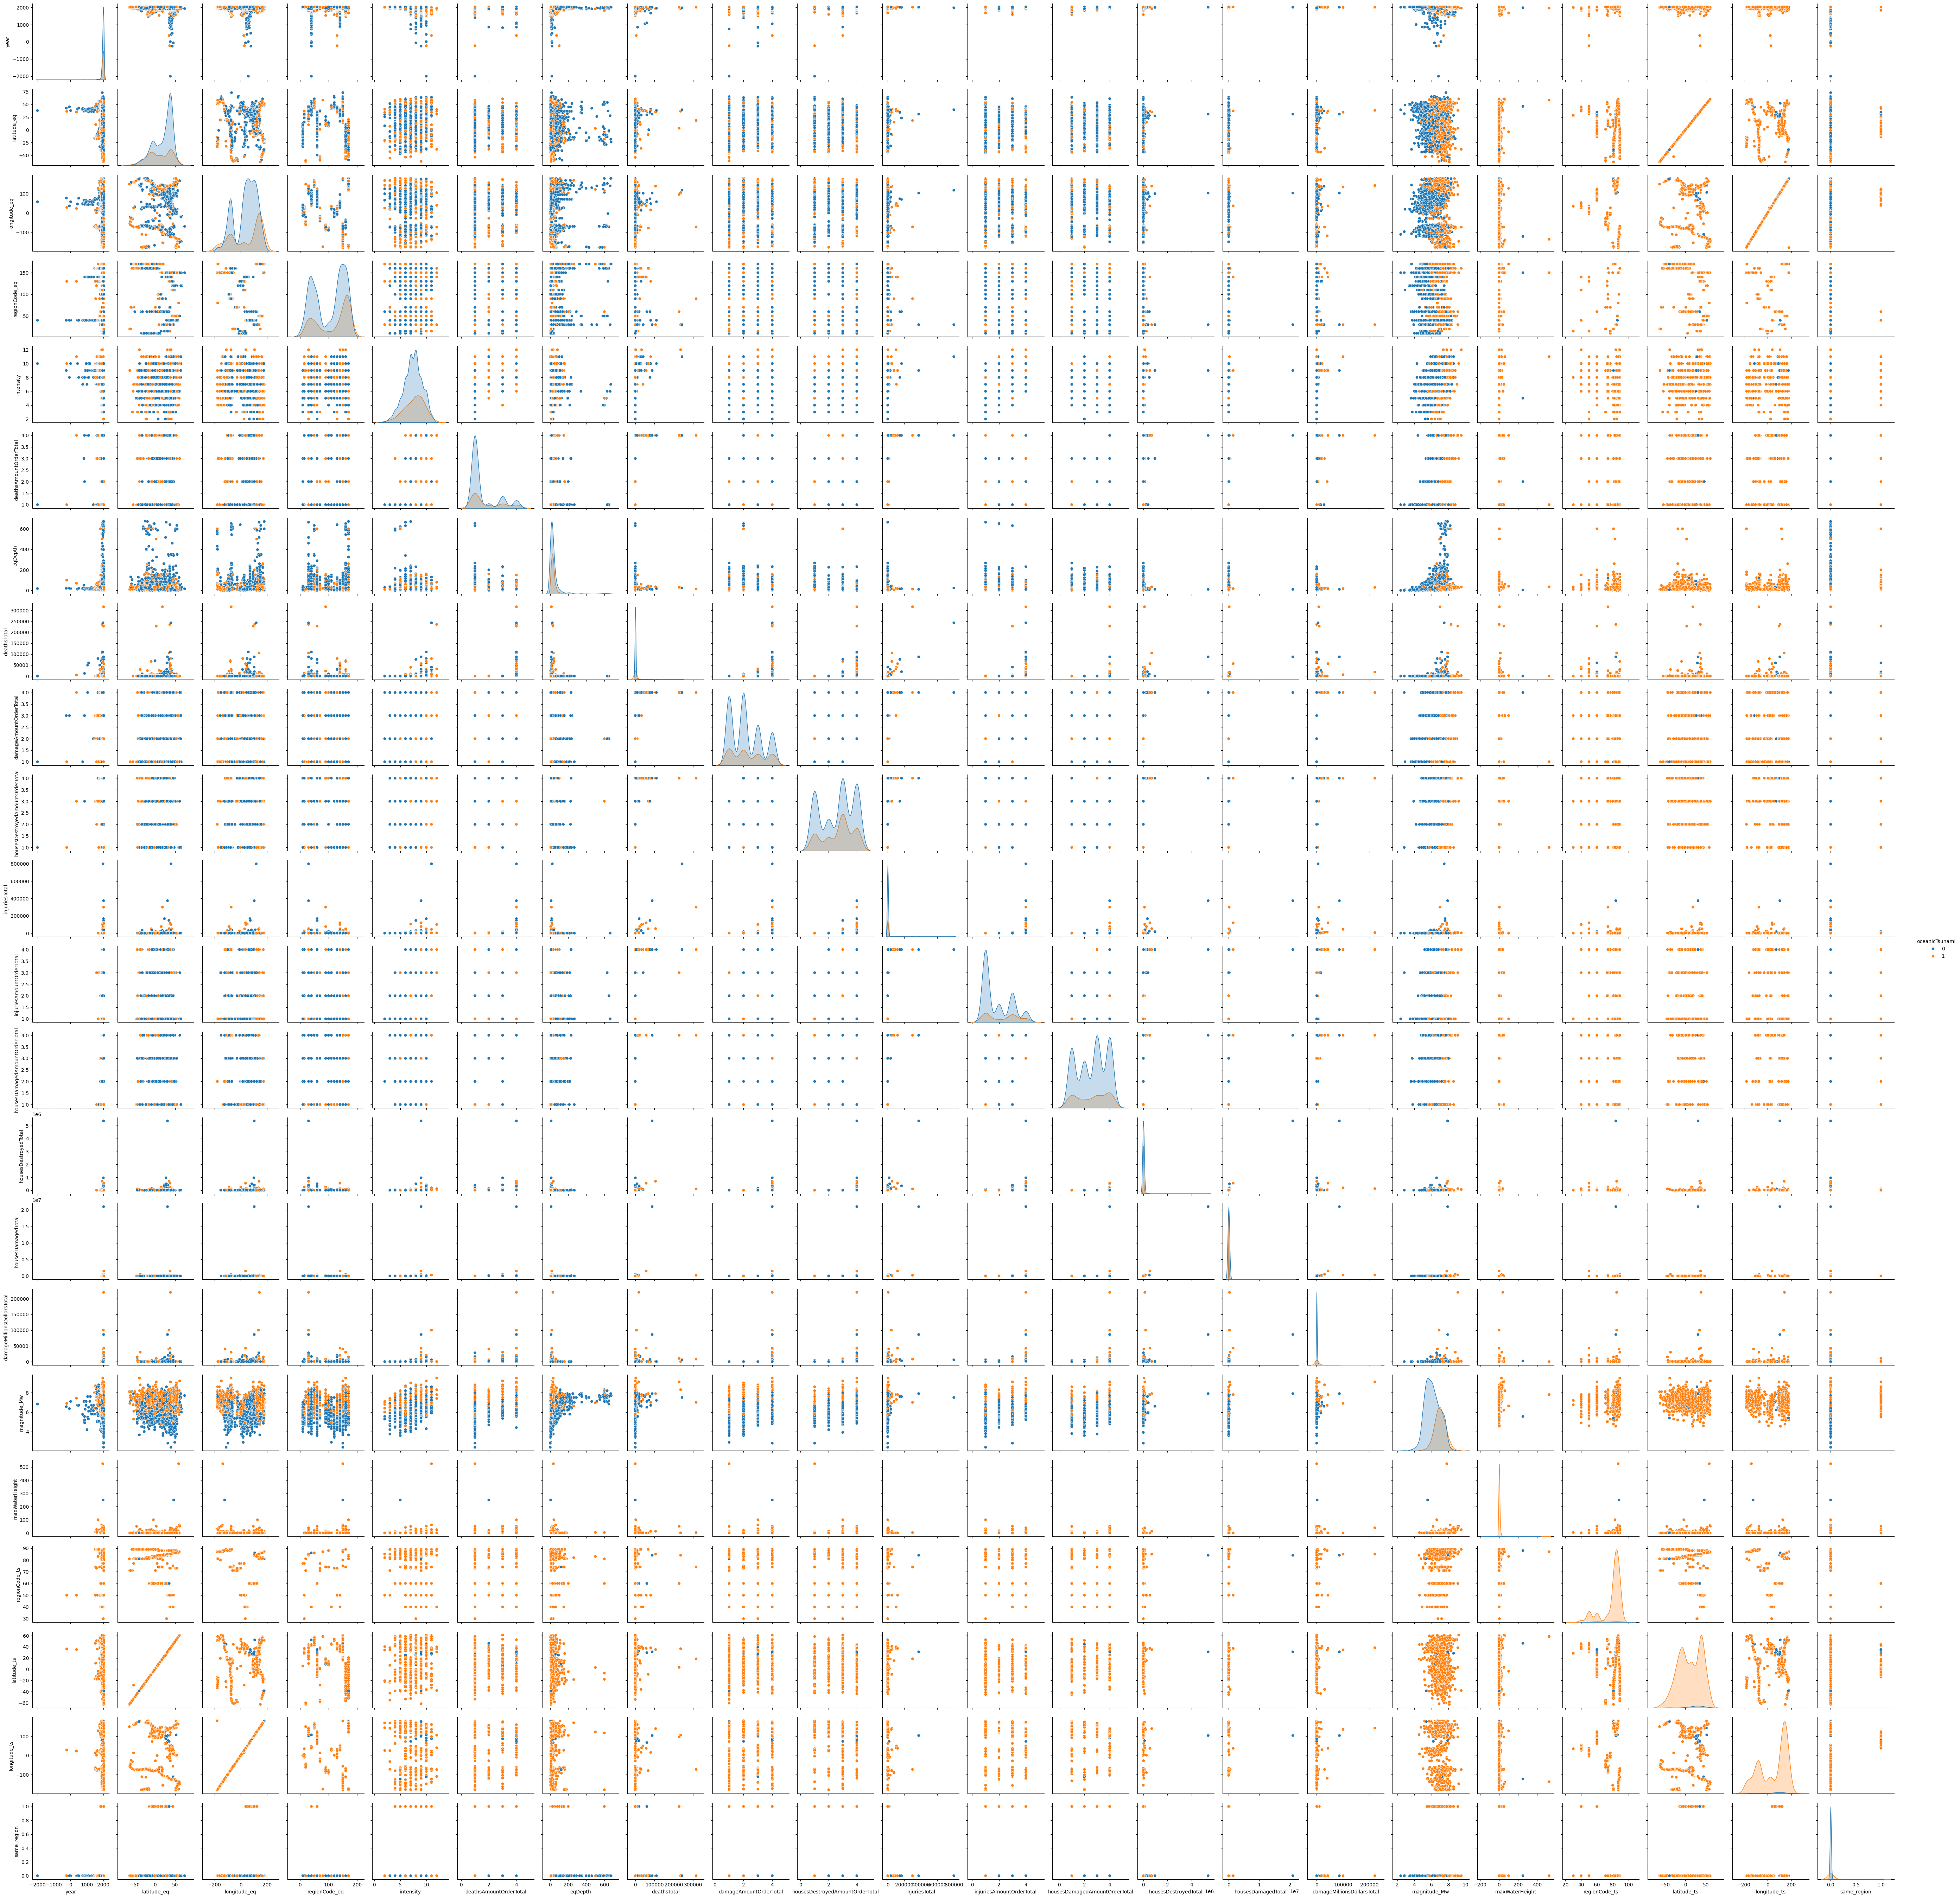

In [13]:
sns.pairplot(df,
            hue='oceanicTsunami')

<Axes: >

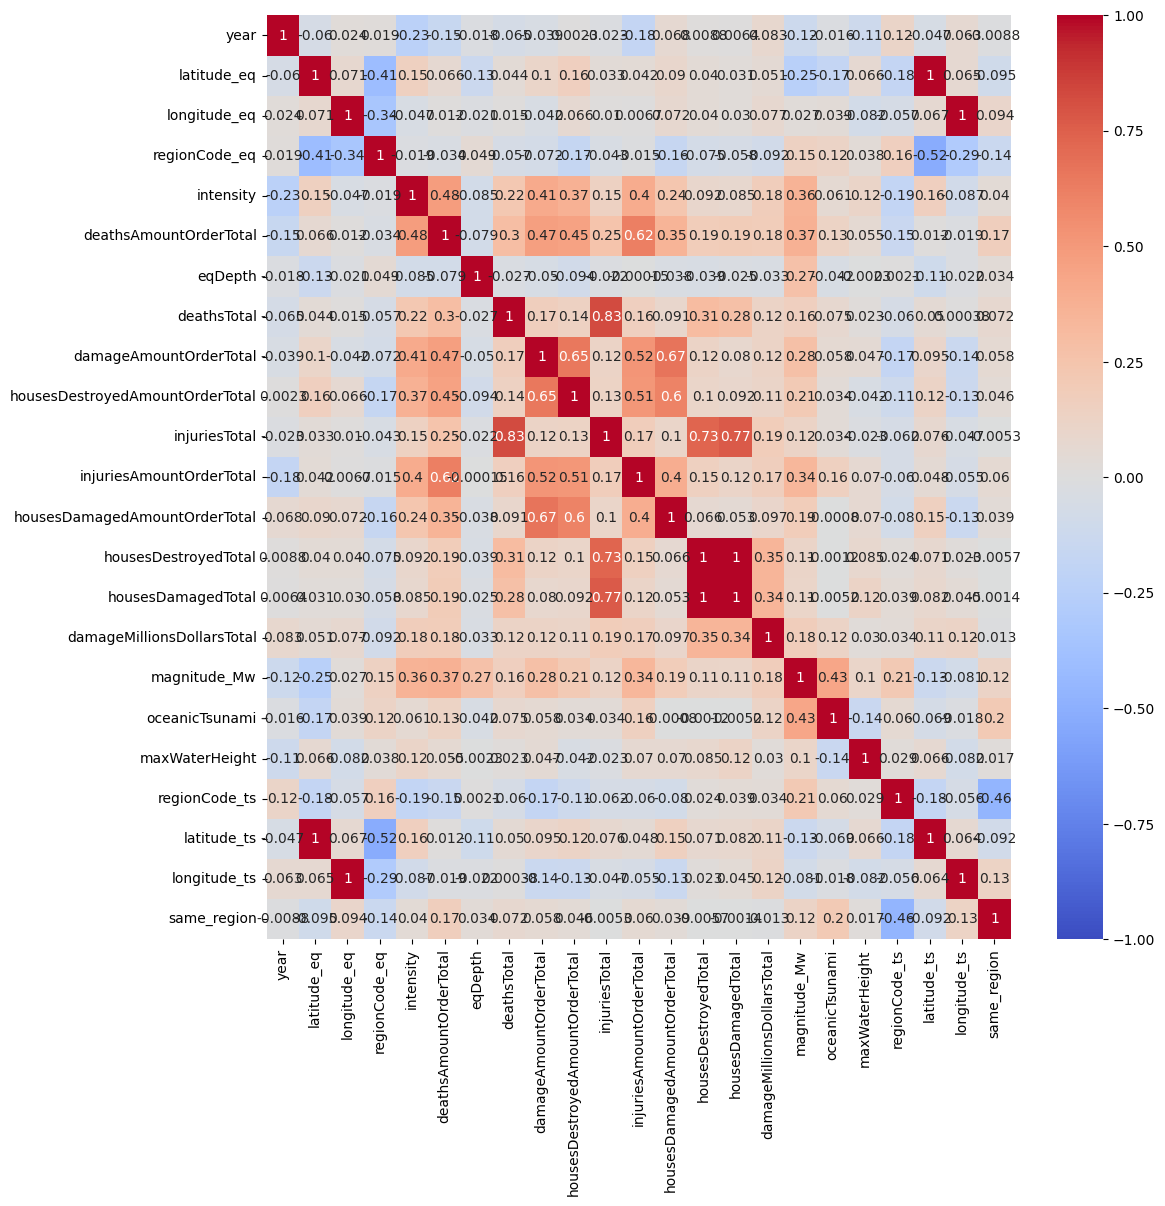

In [14]:
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(numeric_only= True), vmin= -1, cmap = 'coolwarm', annot=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3515 entries, 0 to 3514
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             3515 non-null   int64  
 1   latitude_eq                      3515 non-null   float64
 2   longitude_eq                     3515 non-null   float64
 3   country                          3515 non-null   object 
 4   regionCode_eq                    3515 non-null   int64  
 5   intensity                        1626 non-null   float64
 6   deathsAmountOrderTotal           1508 non-null   float64
 7   eqDepth                          3515 non-null   float64
 8   deathsTotal                      1447 non-null   float64
 9   damageAmountOrderTotal           2476 non-null   float64
 10  housesDestroyedAmountOrderTotal  1150 non-null   float64
 11  injuriesTotal                    1335 non-null   float64
 12  injuriesAmountOrderT

In [16]:
df.describe().T

count          mean            std  \
year                             3515.0   1961.449218     145.939394   
latitude_eq                      3515.0     18.008936      25.112133   
longitude_eq                     3515.0     42.760803      93.791622   
regionCode_eq                    3515.0    107.122333      55.400871   
intensity                        1626.0      7.516605       1.808365   
deathsAmountOrderTotal           1508.0      1.616048       1.036395   
eqDepth                          3515.0     39.217639      68.271930   
deathsTotal                      1447.0   2041.276434   15562.181967   
damageAmountOrderTotal           2476.0      2.204766       1.064996   
housesDestroyedAmountOrderTotal  1150.0      2.660870       1.123272   
injuriesTotal                    1335.0   2502.716854   27009.963471   
injuriesAmountOrderTotal         1507.0      1.928998       1.080862   
housesDamagedAmountOrderTotal     911.0      2.614709       1.144390   
housesDestroyedTotal              703.0  21577.032717  211683.336766   
housesDamagedTotal                529.0  54282.156900  915525.509352   
damageMillionsDollarsTotal        609.0   1609.421901   10970.993096   
magnitude_Mw                     3515.0      6.389537       0.922434   
oceanicTsunami                   3515.0      0.298435       0.457637   
maxWaterHeight                    787.0      3.826086      21.759320   
regionCode_ts                    1069.0     78.833489      12.516968   
latitude_ts                      1069.0     11.570958      28.159770   
longitude_ts                     1069.0     48.963093     114.288445   

                                      min        25%       50%       75%  \
year                            -2000.000  1955.0000  1989.000  2008.000   
latitude_eq                       -62.877    -2.7865    25.954    38.210   
longitude_eq                     -179.984   -63.5780    58.835   122.100   
regionCode_eq                      10.000    50.0000   130.000   160.000   
intensity                           2.000     6.0000     8.000     9.000   
deathsAmountOrderTotal              1.000     1.0000     1.000     2.000   
eqDepth                             0.000    10.0000    23.000    36.000   
deathsTotal                         1.000     2.0000     8.000    74.000   
damageAmountOrderTotal              1.000     1.0000     2.000     3.000   
housesDestroyedAmountOrderTotal     1.000     2.0000     3.000     4.000   
injuriesTotal                       1.000    10.0000    40.000   200.000   
injuriesAmountOrderTotal            1.000     1.0000     1.000     3.000   
housesDamagedAmountOrderTotal       1.000     2.0000     3.000     4.000   
housesDestroyedTotal                1.000    55.5000   471.000  3200.000   
housesDamagedTotal                  1.000   100.0000   720.000  3905.000   
damageMillionsDollarsTotal          0.005     5.0000    31.000   250.000   
magnitude_Mw                        2.390     5.7000     6.400     7.100   
oceanicTsunami                      0.000     0.0000     0.000     1.000   
maxWaterHeight                      0.000     0.1250     0.500     2.000   
regionCode_ts                      30.000    81.0000    84.000    86.000   
latitude_ts                       -62.877   -10.3410    13.000    37.617   
longitude_ts                     -179.971   -71.4170   117.200   142.940   

                                          max  
year                             2.025000e+03  
latitude_eq                      7.312200e+01  
longitude_eq                     1.797530e+02  
regionCode_eq                    1.700000e+02  
intensity                        1.200000e+01  
deathsAmountOrderTotal           4.000000e+00  
eqDepth                          6.750000e+02  
deathsTotal                      3.160000e+05  
damageAmountOrderTotal           4.000000e+00  
housesDestroyedAmountOrderTotal  4.000000e+00  
injuriesTotal                    7.990000e+05  
injuriesAmountOrderTotal         4.000000e+00  
hous

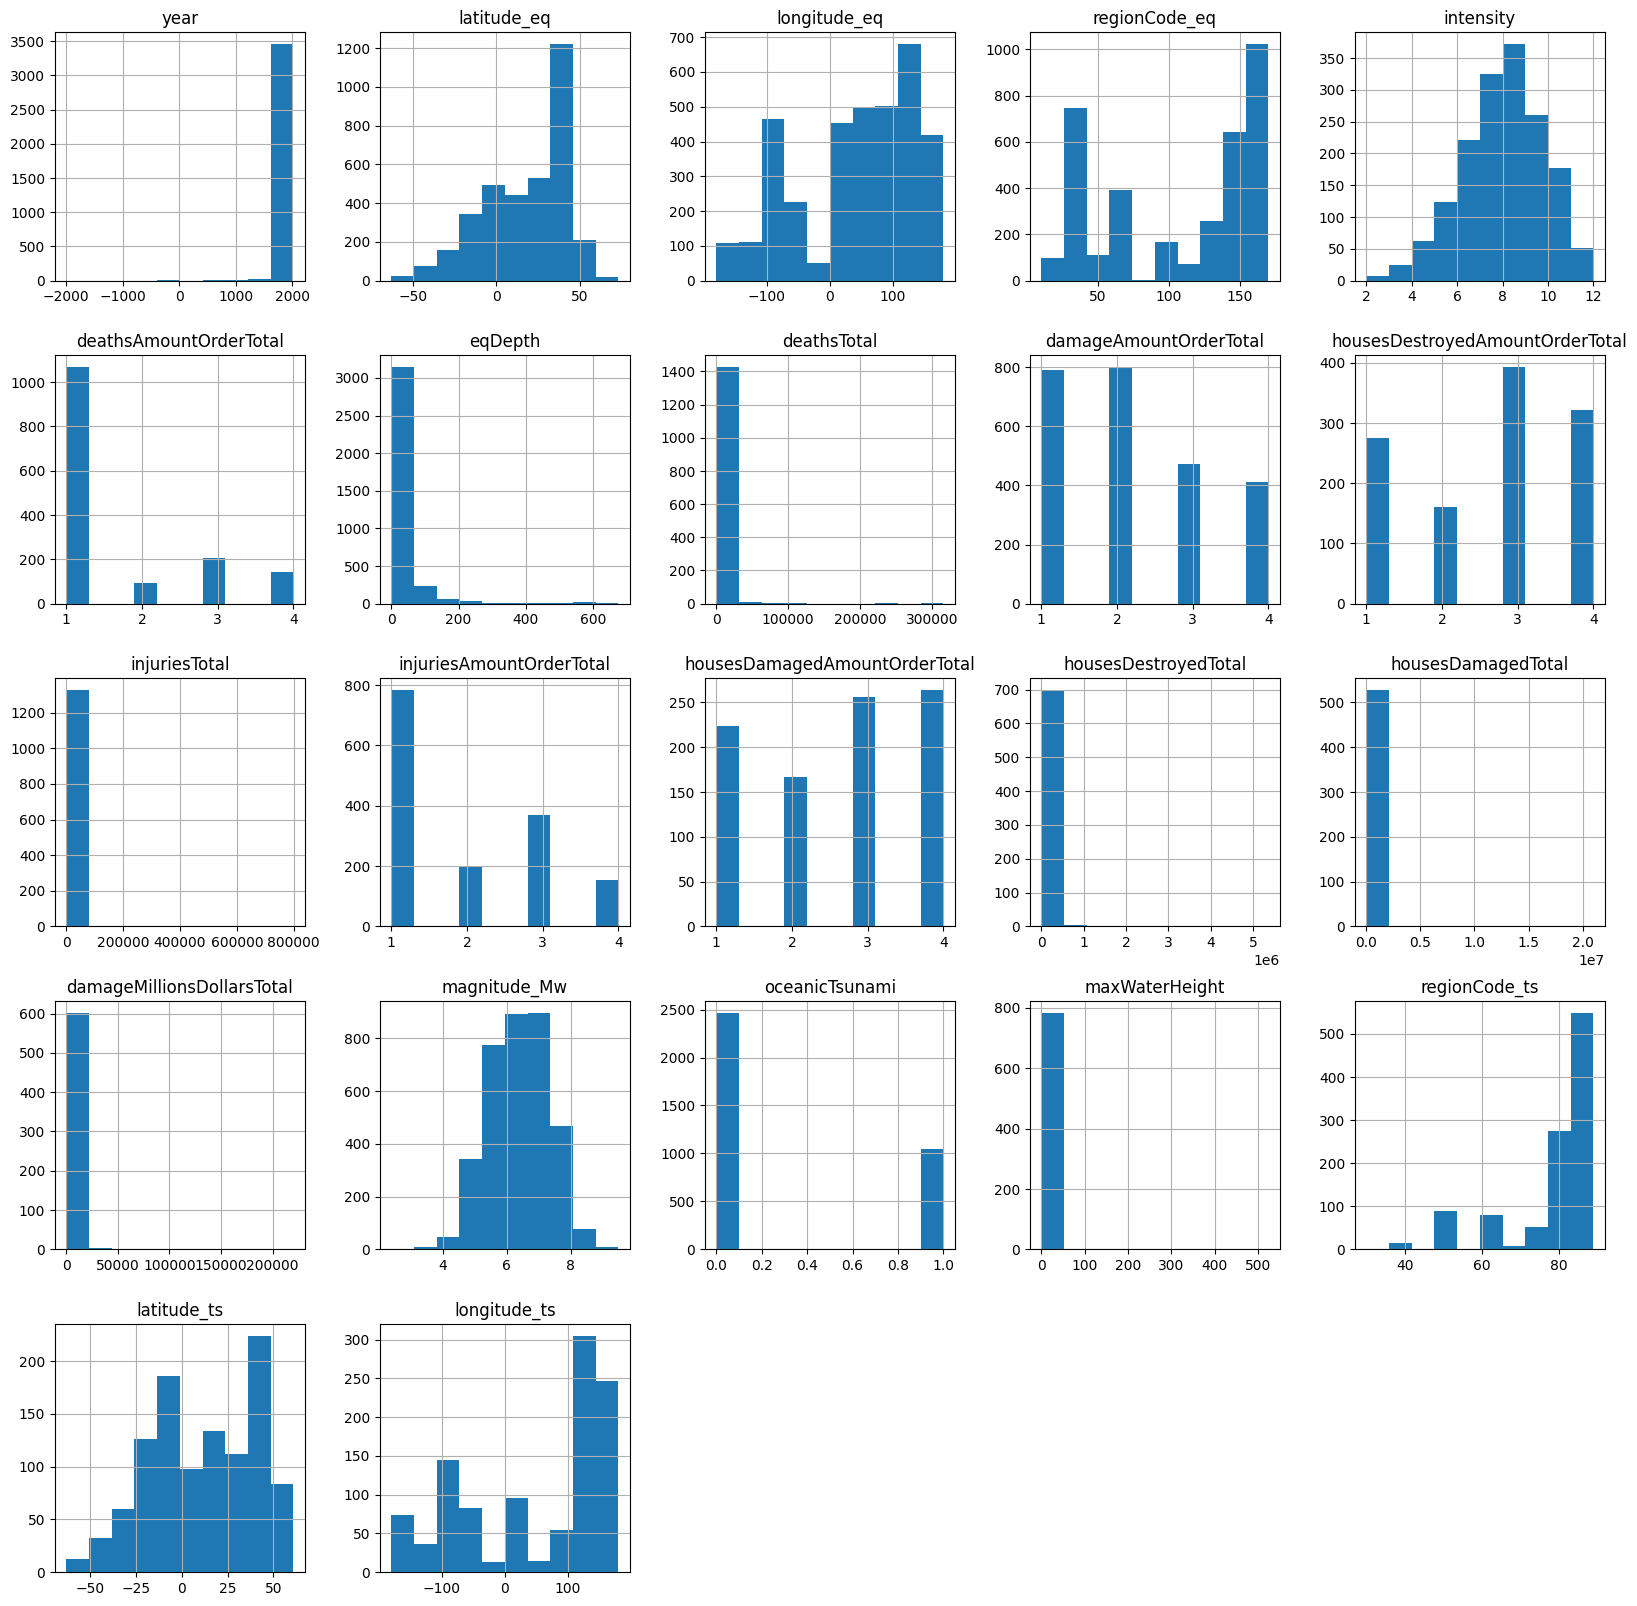

In [17]:
df.hist(figsize=(20,20));

#### Year
No tiene nulos

In [18]:
#year

df['year'].value_counts()

year
 2004    77
 2008    75
 2003    73
 2018    68
 2007    67
         ..
 1891     1
 1892     1
 1818     1
-2000     1
 1782     1
Name: count, Length: 275, dtype: int64

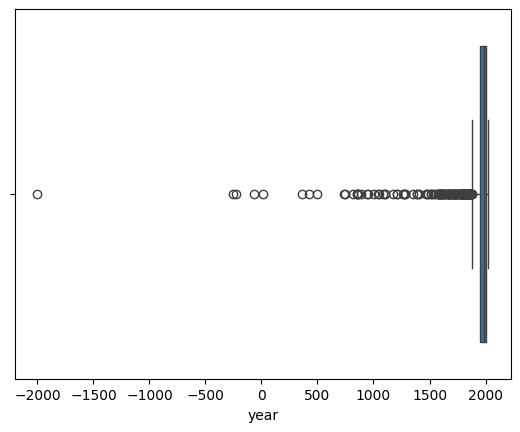

In [19]:
sns.boxplot(x= df['year']);

In [20]:
df[df['year'] == -2000]

year  latitude_eq  longitude_eq       country  regionCode_eq  intensity  \
0 -2000         38.0          58.2  TURKMENISTAN             40       10.0   

   deathsAmountOrderTotal  eqDepth  deathsTotal  damageAmountOrderTotal  \
0                     1.0     18.0          1.0                     1.0   

   housesDestroyedAmountOrderTotal  injuriesTotal  injuriesAmountOrderTotal  \
0                              1.0            NaN                       NaN   

   housesDamagedAmountOrderTotal  housesDestroyedTotal  housesDamagedTotal  \
0                            NaN                   NaN                 NaN   

   damageMillionsDollarsTotal  magnitude_Mw  oceanicTsunami  maxWaterHeight  \
0                         NaN         6.827               0             NaN   

   regionCode_ts  latitude_ts  longitude_ts  same_region  
0            NaN          NaN           NaN        False

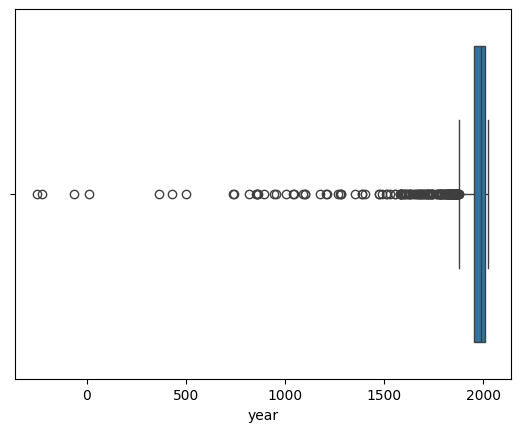

In [21]:
#voy a eliminar el registro del año 2000 A.C porque es muy antiguo, faltan muchos de sus valores y no aporta nada nuevo. Ese terremoto no dio lugar a un tsunami.

df = df.drop(df[df['year'] == -2000].index)
sns.boxplot(x= df['year']);

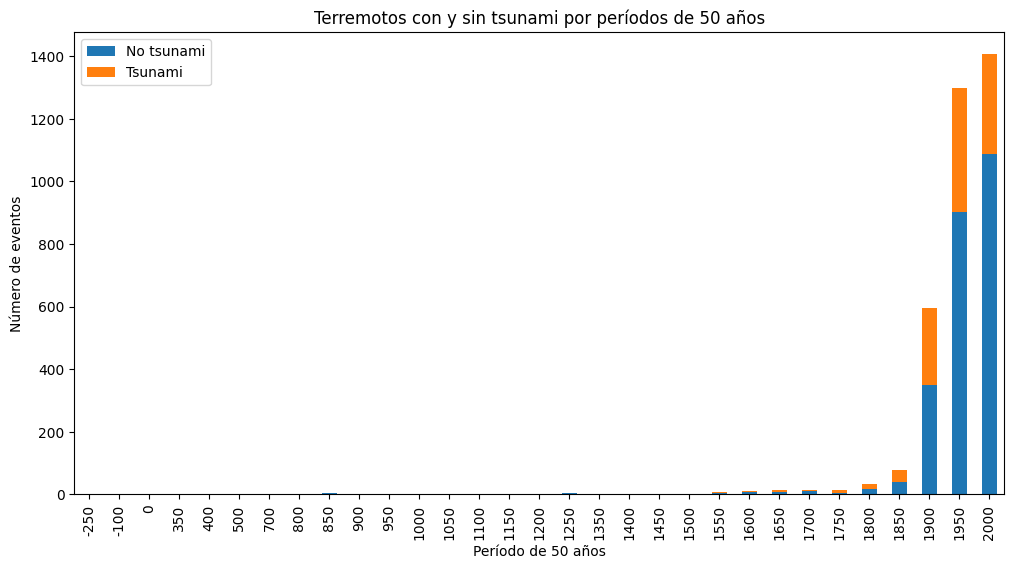

In [22]:
# Numero de terremotos por cada 50 años divididos por la formación de tsunami o no.

df['half_century'] = (df['year'] // 50) * 50

conteo_50 = df.groupby(['half_century', 'oceanicTsunami']).size().unstack(fill_value=0)

conteo_50.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel("Período de 50 años")
plt.ylabel("Número de eventos")
plt.title("Terremotos con y sin tsunami por períodos de 50 años")
plt.legend(["No tsunami", "Tsunami"])
plt.show()


#vemos que aumenta el número de registro según avanzan los grupos, es normal, cada vez tenemos más información ya que los sucesos están más documentados.

### Country

No tiene nulos

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3514 entries, 1 to 3514
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             3514 non-null   int64  
 1   latitude_eq                      3514 non-null   float64
 2   longitude_eq                     3514 non-null   float64
 3   country                          3514 non-null   object 
 4   regionCode_eq                    3514 non-null   int64  
 5   intensity                        1625 non-null   float64
 6   deathsAmountOrderTotal           1507 non-null   float64
 7   eqDepth                          3514 non-null   float64
 8   deathsTotal                      1446 non-null   float64
 9   damageAmountOrderTotal           2475 non-null   float64
 10  housesDestroyedAmountOrderTotal  1149 non-null   float64
 11  injuriesTotal                    1335 non-null   float64
 12  injuriesAmountOrderT

In [24]:
df['country'].value_counts()

country
INDONESIA     294
CHINA         256
JAPAN         225
IRAN          218
USA           166
             ... 
KENYA           1
MADAGASCAR      1
COMOROS         1
ZAMBIA          1
SYRIA           1
Name: count, Length: 133, dtype: int64

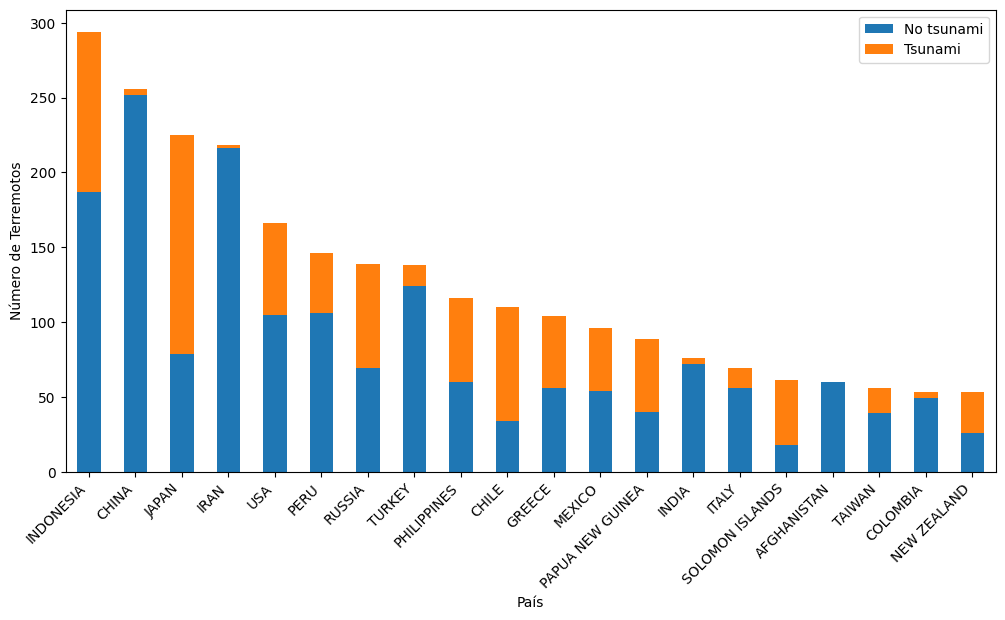

In [25]:
#Vamos a ver el top 20 de paises con más terremotos y si causaron un tsunami posterior

conteo_pais = df.groupby(['country', 'oceanicTsunami']).size().unstack(fill_value=0)

top20 = conteo_pais.sum(axis=1).sort_values(ascending=False).head(20)
conteo_top20 = conteo_pais.loc[top20.index]

# Gráfico de barras apiladas
conteo_top20.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel("País")
plt.ylabel("Número de Terremotos")
plt.legend(["No tsunami", "Tsunami"])
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
# Como análisis inicial y sin tener en cuenta otros factores, podemos ver, en el top 3 están Indonesia, China y Japón. Para las islas, como Indonesia y Japón, el terremoto causó un posterior tsunami.
# En cambio en paises continentales como China, los terremotos no causaron un posterior tsunami.
# Hay otros países continentales en las que el porcentaje de posterior tsunami es alto, podría ser por los kilómetros de costa y que las costas del pais están cercanas al zonas sísmicas. 

### Region Code eq
No tiene nulos

| Código | Región                            | Países / Áreas                                                                 |
|--------|-----------------------------------|--------------------------------------------------------------------------------|
| 150    | North America and Hawaii          | Canada, Mexico, USA                                                            |
| 100    | Central America                   | Costa Rica, El Salvador, Guatemala, Honduras, Nicaragua, Panama                |
| 90     | Caribbean                         | Antigua and Barbuda, Barbados, Cuba, Dominican Republic, French Guiana, Grenada, Guadeloupe, Haiti, Jamaica, Martinique, Puerto Rico, Saint Lucia, Saint Vincent and the Grenadines, Trinidad and Tobago, U.S. Virgin Islands |
| 160    | South America                     | Argentina, Bolivia, Brazil, Chile, Colombia, Ecuador, Peru, Venezuela          |
| 70     | Atlantic Ocean                    | -                                                                              |
| 15     | Northern Africa                   | Algeria, Egypt, Libya, Morocco, Sudan, Tunisia                                 |
| 10     | Central, Western and S. Africa    | Burundi, Cameroon, Canary Islands, Central African Republic, Congo, Coite d’Ivoire, Ethiopia, Gabon, Ghana, Guinea, Guyana, Malawi, Mozambique, Rwanda, Sierra Leone, South Africa, Tanzania, Togo, Uganda, Zambia |
| 20     | Antarctica                        | -                                                                              |
| 120    | Northern and Western Europe       | Austria, Belgium, France, Germany, Iceland, Netherlands, Switzerland, United Kingdom |
| 130    | Southern Europe                   | Azores (Portugal), Black Sea, Bosnia-Herzegovina, Croatia, Cyprus, Greece, Italy, Macedonia, Portugal, Serbia and Montenegro, Slovenia, Spain |
| 110    | Eastern Europe                    | Bulgaria, Hungary, Poland, Romania, Slovakia, Ukraine                          |
| 140    | Middle East                       | Iran, Iraq, Israel, Jordan, Lebanon, Saudi Arabia, Syria, Turkey, Yemen        |
| 40     | Central Asia and Caucasus         | Afghanistan, Armenia, Azerbaijan, Black Sea, Western China, Georgia, Kazakhstan, Kyrgyzstan, Mongolia, Russia, Tajikistan, Turkmenistan, Uzbekistan |
| 30     | East Asia                         | Eastern China, East China Sea, Japan, Japan Sea, North Korea, South Korea, Taiwan, Yellow Sea |
| 60     | S. and SE. Asia and Indian Ocean  | Bangladesh, Bhutan, India, Indian Ocean, Myanmar (Burma), Nepal, Pakistan, Sri Lanka, Thailand, Vietnam |
| 170    | Central and South Pacific         | Australia, Caroline Islands, Celebes Sea, Cook Islands, Fiji, French Polynesia, Guam, Indonesia, Kermadec Islands (New Zealand), Kiribati, Malaysia, Republic of Marshall Islands, Federated States of Micronesia, New Caledonia, New Zealand, Northern Mariana Islands, Pacific Ocean, Papua New Guinea, Philippines, Samoa, Solomon Islands, Solomon Sea, South China Sea, South Georgia and the South Sandwich Islands, Tasman Sea, Timor Sea, Tonga, Vanuatu |
| 80     | Bering Sea                        | -                                                                              |
| 50     | Kamchatka and Kuril Islands       | -  

In [27]:
df['regionCode_eq'].value_counts()

regionCode_eq
170    617
30     477
160    406
60     374
140    366
150    276
40     269
130    258
50     111
100    105
90      64
10      52
120     41
15      39
110     32
70      20
20       6
80       1
Name: count, dtype: int64

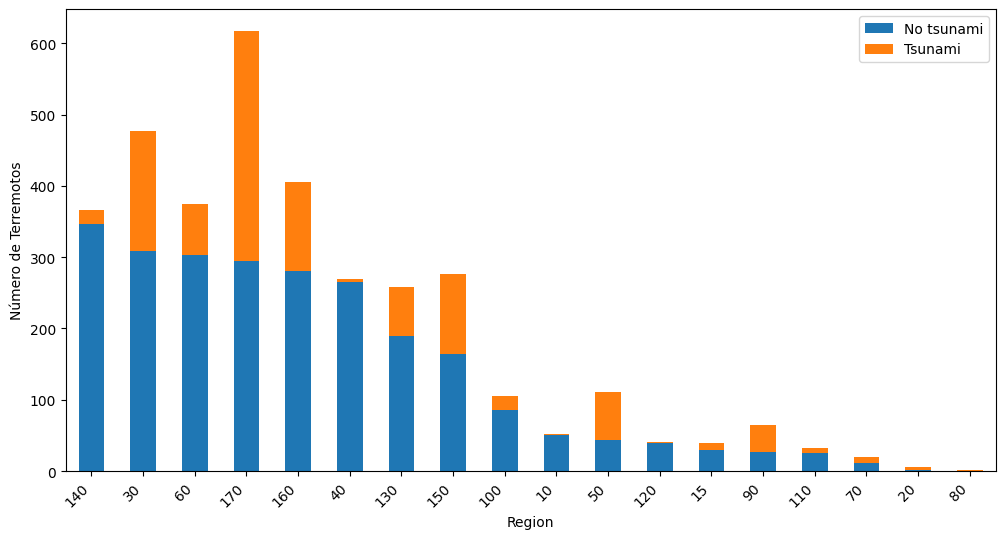

In [28]:
#Vamos a ver por regiones la cantidad de terremotos y si causaron un tsunami posterior

conteo_region = df.groupby(['regionCode_eq', 'oceanicTsunami']).size().unstack(fill_value=0).sort_values(by= [0,1],ascending=False)

conteo_region.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel("Region")
plt.ylabel("Número de Terremotos")
plt.legend(["No tsunami", "Tsunami"])
plt.xticks(rotation=45, ha='right')
plt.show()


In [29]:
# La región que más terremotos sufre es la 170: Pacífico Central y Sur.
# Le sigue la región 30 Asia Oriental, 160 Suramérica.

#Llama la atención las regiones 50 Kamchatka e Islas Kuril y 90 Caribe, donde hay más terremotos con tsunami posterior que sin el. Esto es sin duda a que son zonas con archipiélagos.

### Intensidad

La mitad de las filas de intensidad están vacías.
**Como intensidad está relacionada con la magnitud, voy a crear una función de imputación para luego añadirla al pipeline mediante un transformer:

Lo que hago es agrupar las filas con la misma magnitud y aplico la mediana de esas filas a los huecos de intensidad. Luego paso la intensidad a entero porque no tiene sentido que sea un float.

**def fill_intensity_by_magnitude(df):
    df = df.copy()

    df['intensity'] = df.groupby('magnitude_Mw')['intensity'].transform(
        lambda x: x.fillna(x.median())
    )
    df['intensity'] = df['intensity'].round().astype(int)
    return df**

Después utilizaré esta función como un transformer para el pipeline:

**intensity_imputer = FunctionTransformer(fill_intensity_by_magnitude)**



In [30]:
# compruebo que la función rellene los huecos correctamente
def fill_intensity_by_magnitude(df):
    df = df.copy()
    # Agrupar por magnitude y rellenar con la mediana de cada grupo
    df['intensity'] = df.groupby('magnitude_Mw')['intensity'].transform(
        lambda x: x.fillna(x.median())
    )
    return df

fill_intensity_by_magnitude(df)

c:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out,

year  latitude_eq  longitude_eq       country  regionCode_eq  intensity  \
1     -250       42.700        77.500    KYRGYZSTAN             40        9.0   
2     -227       36.300        28.300        GREECE            130       10.0   
3       10       38.000        58.300  TURKMENISTAN             40       10.0   
4      -63       45.200        36.600        RUSSIA             40        8.0   
5      365       35.000        23.000        GREECE            130       11.0   
...    ...          ...           ...           ...            ...        ...   
3510  2025       52.512       160.324        RUSSIA             50        8.0   
3511  2025       39.312        28.069        TURKEY            140        7.0   
3512  2025       14.055       -89.883     GUATEMALA            100        7.0   
3513  2025       -1.282       120.727     INDONESIA            170        7.0   
3514  2025      -60.186       -61.821    ANTARCTICA             20        8.0   

      deathsAmountOrderTotal  eqDepth  deathsTotal  damageAmountOrderTotal  \
1                        NaN     20.0          NaN                     3.0   
2                        1.0    100.0          NaN                     1.0   
3                        NaN     18.0          NaN                     NaN   
4                        NaN     20.0          NaN                     3.0   
5                        4.0     70.0       5000.0                     4.0   
...                      ...      ...          ...                     ...   
3510                     1.0     35.0          1.0                     2.0   
3511                     1.0     10.0          1.0                     2.0   
3512                     1.0     10.0          1.0                     3.0   
3513                     1.0      8.0          1.0                     2.0   
3514                     NaN     10.0          NaN                     NaN   

      housesDestroyedAmountOrderTotal  injuriesTotal  \
1                                 NaN            NaN   
2                                 1.0            NaN   
3                                 NaN            NaN   
4                                 NaN            NaN   
5                                 3.0            NaN   
...                               ...            ...   
3510                              NaN           13.0   
3511                              1.0           29.0   
3512                              NaN            NaN   
3513                              1.0           41.0   
3514                              NaN            NaN   

      injuriesAmountOrderTotal  housesDamagedAmountOrderTotal  \
1                          NaN                            NaN   
2                          NaN                            NaN   
3                          NaN                            NaN   
4                          NaN                            NaN   
5                          NaN                            NaN   
...                        ...                            ...   
3510                       1.0                            NaN   
3511                       1.0                            NaN   
3512                       NaN                            4.0   
3513                       1.0                            1.0   
3514                       NaN                            NaN   

      housesDestroyedTotal  housesDamagedTotal  damageMillionsDollarsTotal  \
1                      NaN                 NaN                         NaN   
2                      NaN                 NaN                         NaN   
3                      NaN                 NaN                         NaN   
4                      NaN                 NaN                         NaN   
5                      NaN                 NaN                         NaN   
...                    ...                 ...                         ...   
3510                   NaN                 NaN                         NaN   
3511              

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3514 entries, 1 to 3514
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             3514 non-null   int64  
 1   latitude_eq                      3514 non-null   float64
 2   longitude_eq                     3514 non-null   float64
 3   country                          3514 non-null   object 
 4   regionCode_eq                    3514 non-null   int64  
 5   intensity                        1625 non-null   float64
 6   deathsAmountOrderTotal           1507 non-null   float64
 7   eqDepth                          3514 non-null   float64
 8   deathsTotal                      1446 non-null   float64
 9   damageAmountOrderTotal           2475 non-null   float64
 10  housesDestroyedAmountOrderTotal  1149 non-null   float64
 11  injuriesTotal                    1335 non-null   float64
 12  injuriesAmountOrderT

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3514 entries, 1 to 3514
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             3514 non-null   int64  
 1   latitude_eq                      3514 non-null   float64
 2   longitude_eq                     3514 non-null   float64
 3   country                          3514 non-null   object 
 4   regionCode_eq                    3514 non-null   int64  
 5   intensity                        1625 non-null   float64
 6   deathsAmountOrderTotal           1507 non-null   float64
 7   eqDepth                          3514 non-null   float64
 8   deathsTotal                      1446 non-null   float64
 9   damageAmountOrderTotal           2475 non-null   float64
 10  housesDestroyedAmountOrderTotal  1149 non-null   float64
 11  injuriesTotal                    1335 non-null   float64
 12  injuriesAmountOrderT

### Las muertes, daños y desperfectos:

En principio las eliminamos todas porque la única columna con menos huecos no tiene ninguna relación con el target.

In [33]:
df.columns

Index(['year', 'latitude_eq', 'longitude_eq', 'country', 'regionCode_eq',
       'intensity', 'deathsAmountOrderTotal', 'eqDepth', 'deathsTotal',
       'damageAmountOrderTotal', 'housesDestroyedAmountOrderTotal',
       'injuriesTotal', 'injuriesAmountOrderTotal',
       'housesDamagedAmountOrderTotal', 'housesDestroyedTotal',
       'housesDamagedTotal', 'damageMillionsDollarsTotal', 'magnitude_Mw',
       'oceanicTsunami', 'maxWaterHeight', 'regionCode_ts', 'latitude_ts',
       'longitude_ts', 'same_region', 'half_century'],
      dtype='object')

In [34]:
data_report(df[['deathsAmountOrderTotal', 'deathsTotal','damageAmountOrderTotal', 'housesDestroyedAmountOrderTotal','injuriesTotal', 'injuriesAmountOrderTotal',
       'housesDamagedAmountOrderTotal', 'housesDestroyedTotal','housesDamagedTotal', 'damageMillionsDollarsTotal']])

DATA_TYPE  MISSINGS (%)  UNIQUE_VALUES  \
COL_N                                                                    
deathsAmountOrderTotal            float64          57.0              4   
deathsTotal                       float64          59.0            329   
damageAmountOrderTotal            float64          30.0              4   
housesDestroyedAmountOrderTotal   float64          67.0              4   
injuriesTotal                     float64          62.0            377   
injuriesAmountOrderTotal          float64          57.0              4   
housesDamagedAmountOrderTotal     float64          74.0              4   
housesDestroyedTotal              float64          80.0            386   
housesDamagedTotal                float64          85.0            371   
damageMillionsDollarsTotal        float64          83.0            299   

                                 CARDIN (%)  
COL_N                                        
deathsAmountOrderTotal                  0.0  
deathsTotal                             9.0  
damageAmountOrderTotal                  0.0  
housesDestroyedAmountOrderTotal         0.0  
injuriesTotal                          11.0  
injuriesAmountOrderTotal                0.0  
housesDamagedAmountOrderTotal           0.0  
housesDestroyedTotal                   11.0  
housesDamagedTotal                     11.0  
damageMillionsDollarsTotal              9.0

In [35]:
consequences=df[['deathsAmountOrderTotal', 'deathsTotal','damageAmountOrderTotal', 'housesDestroyedAmountOrderTotal','injuriesTotal', 'injuriesAmountOrderTotal',
       'housesDamagedAmountOrderTotal', 'housesDestroyedTotal','housesDamagedTotal', 'damageMillionsDollarsTotal','oceanicTsunami']]

<Axes: >

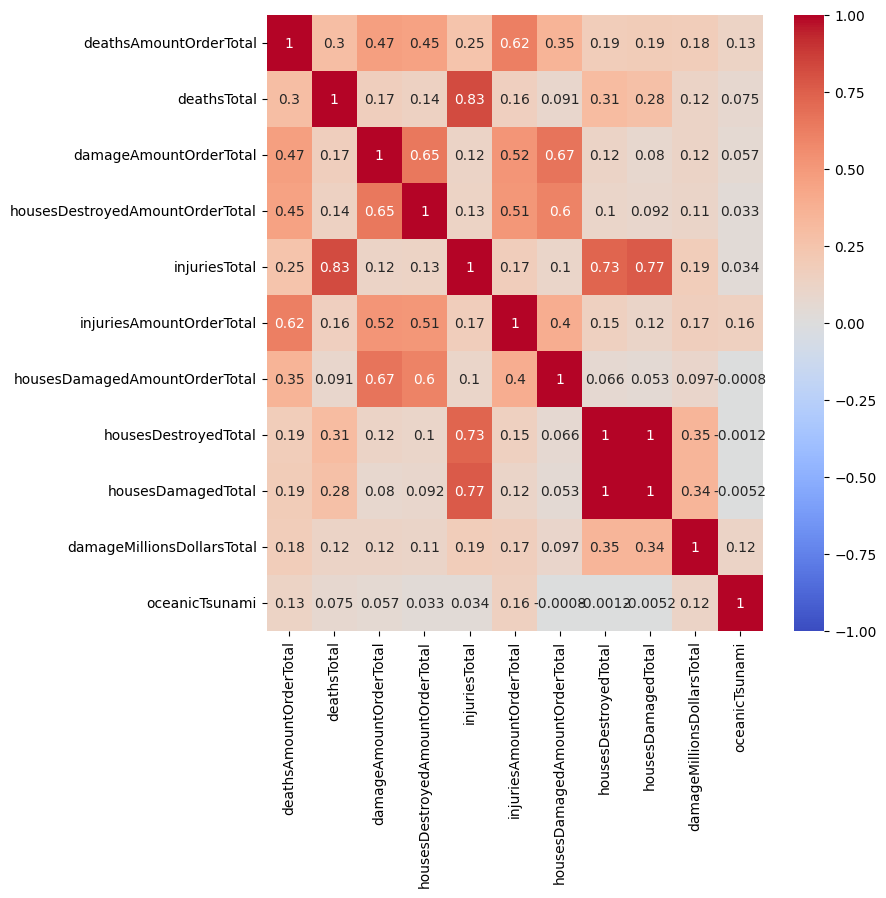

In [36]:
plt.figure(figsize=(8,8))

sns.heatmap(consequences.corr(numeric_only= True), vmin= -1, cmap = 'coolwarm', annot=True)

In [37]:
cols_to_drop = ['deathsAmountOrderTotal', 'deathsTotal','damageAmountOrderTotal', 
                'housesDestroyedAmountOrderTotal','injuriesTotal', 'injuriesAmountOrderTotal',
                'housesDamagedAmountOrderTotal', 'housesDestroyedTotal','housesDamagedTotal', 
                'damageMillionsDollarsTotal']

df.drop(columns=cols_to_drop, inplace=True)

### EqDepth: profundidad del foco del terremoto.

In [38]:
df['eqDepth'].value_counts()

eqDepth
10.0     544
33.0     380
15.0     190
60.0     115
20.0     112
        ... 
129.0      1
590.0      1
210.0      1
76.0       1
117.0      1
Name: count, Length: 206, dtype: int64

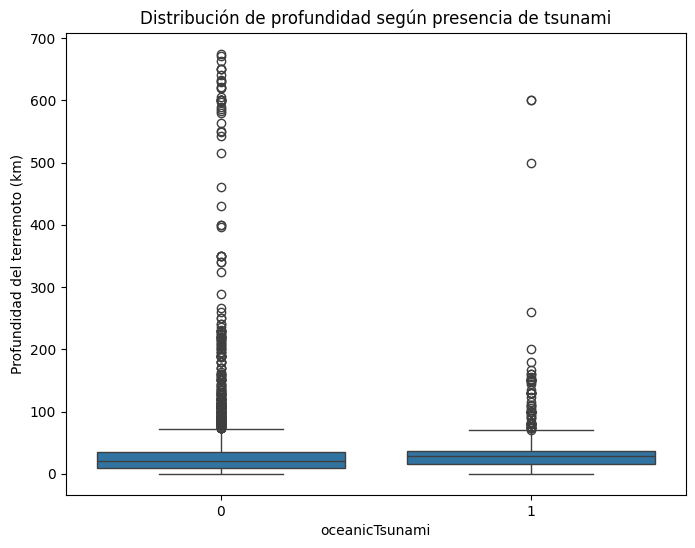

In [39]:
plt.figure(figsize=(8,6))
sns.boxplot(x='oceanicTsunami', y='eqDepth', data=df)
plt.ylabel('Profundidad del terremoto (km)')
plt.title('Distribución de profundidad según presencia de tsunami')
plt.show()

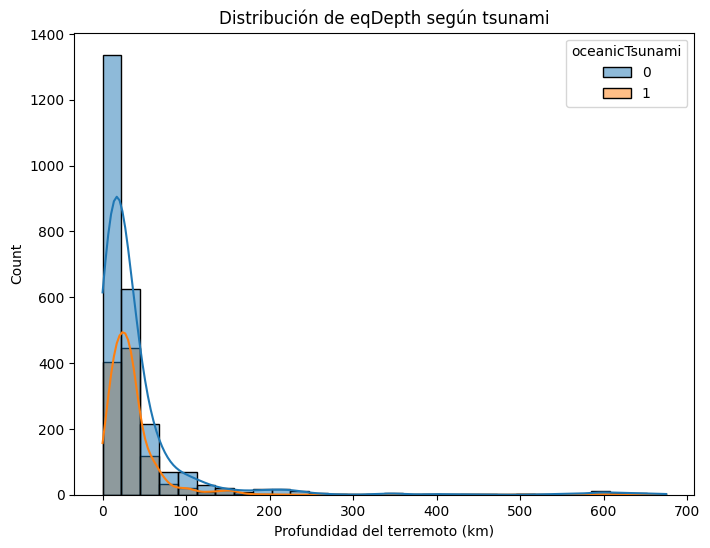

In [40]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='eqDepth', hue='oceanicTsunami', kde=True, bins=30)
plt.xlabel('Profundidad del terremoto (km)')
plt.title('Distribución de eqDepth según tsunami')
plt.show()

In [41]:
# Como vemos, las dos curvas se solapan bastante, pero podemos ver que la que generó tsunamis, decae un poco antes, indicando que terremotos muy profundos no suelen dar lugar a tsunamis.

#### Magnitud de Momento

In [42]:
df['magnitude_Mw'].value_counts()

magnitude_Mw
7.500    111
6.400     84
6.000     84
6.100     82
5.600     78
        ... 
3.900      1
4.700      1
3.800      1
3.410      1
3.495      1
Name: count, Length: 150, dtype: int64

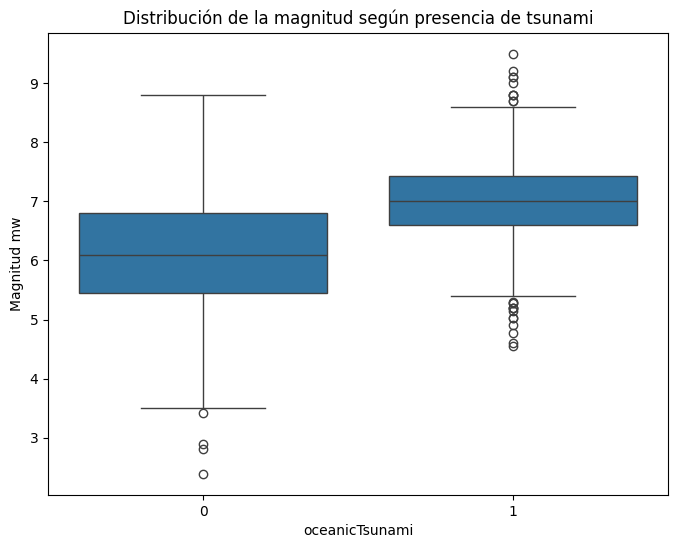

In [43]:
plt.figure(figsize=(8,6))
sns.boxplot(x='oceanicTsunami', y='magnitude_Mw', data=df)
plt.ylabel('Magnitud mw')
plt.title('Distribución de la magnitud según presencia de tsunami')
plt.show()

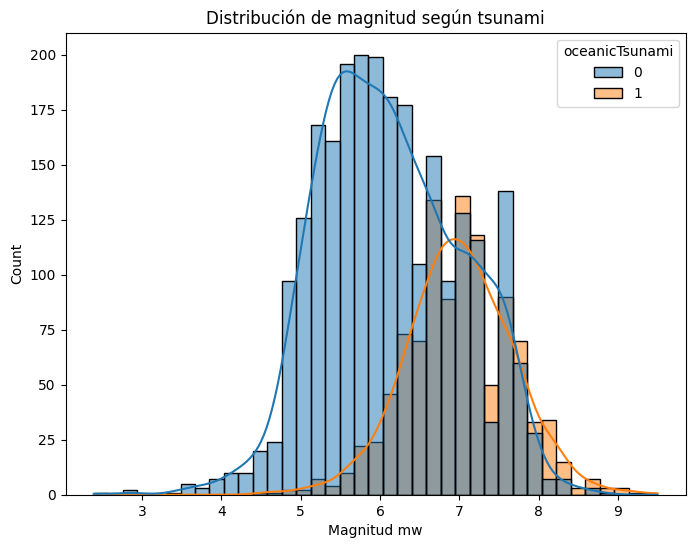

In [44]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='magnitude_Mw', hue='oceanicTsunami', kde=True)
plt.xlabel('Magnitud mw')
plt.title('Distribución de magnitud según tsunami')
plt.show()

In [45]:
#Como era de esperar, a mayor magnitud del terremoto, mayor ocurrencia de tsunami.

### Altura máxima del agua.

Tiene muchos nulos y además le da pistas a los modelos que entrenemos ya que la altura de agua solo aumenta cuando ocurre el tsunami.

La eliminamos.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3514 entries, 1 to 3514
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            3514 non-null   int64  
 1   latitude_eq     3514 non-null   float64
 2   longitude_eq    3514 non-null   float64
 3   country         3514 non-null   object 
 4   regionCode_eq   3514 non-null   int64  
 5   intensity       1625 non-null   float64
 6   eqDepth         3514 non-null   float64
 7   magnitude_Mw    3514 non-null   float64
 8   oceanicTsunami  3514 non-null   int64  
 9   maxWaterHeight  787 non-null    float64
 10  regionCode_ts   1069 non-null   float64
 11  latitude_ts     1069 non-null   float64
 12  longitude_ts    1069 non-null   float64
 13  same_region     3514 non-null   bool   
 14  half_century    3514 non-null   int64  
dtypes: bool(1), float64(9), int64(4), object(1)
memory usage: 387.9+ KB


In [47]:
df.drop(columns=['maxWaterHeight'], inplace=True)

### Para el resto de columnas: Region_Code_ts, Latitude y longitude ts y same_region_ts:

Las eliminamos también porque nos indican que existe el tsunami y de nuevo le damos pistas.

También eliminamos half_century

In [48]:
df.columns

Index(['year', 'latitude_eq', 'longitude_eq', 'country', 'regionCode_eq',
       'intensity', 'eqDepth', 'magnitude_Mw', 'oceanicTsunami',
       'regionCode_ts', 'latitude_ts', 'longitude_ts', 'same_region',
       'half_century'],
      dtype='object')

In [49]:
df.drop(columns=['regionCode_ts', 'latitude_ts', 'longitude_ts', 'same_region',
       'half_century'], inplace=True)

## DATAFRAME LISTO
Luego nuestro dataframe para predecir se queda de la siguiente forma:

Habrá que utilizar el transformer para la intensidad.

In [50]:
df

year  latitude_eq  longitude_eq       country  regionCode_eq  intensity  \
1     -250       42.700        77.500    KYRGYZSTAN             40        9.0   
2     -227       36.300        28.300        GREECE            130       10.0   
3       10       38.000        58.300  TURKMENISTAN             40       10.0   
4      -63       45.200        36.600        RUSSIA             40        8.0   
5      365       35.000        23.000        GREECE            130       11.0   
...    ...          ...           ...           ...            ...        ...   
3510  2025       52.512       160.324        RUSSIA             50        8.0   
3511  2025       39.312        28.069        TURKEY            140        NaN   
3512  2025       14.055       -89.883     GUATEMALA            100        NaN   
3513  2025       -1.282       120.727     INDONESIA            170        NaN   
3514  2025      -60.186       -61.821    ANTARCTICA             20        NaN   

      eqDepth  magnitude_Mw  oceanicTsunami  
1        20.0         6.559               0  
2       100.0         6.894               1  
3        18.0         7.100               0  
4        20.0         6.358               0  
5        70.0         7.430               1  
...       ...           ...             ...  
3510     35.0         8.800               1  
3511     10.0         6.100               0  
3512     10.0         5.700               0  
3513      8.0         5.800               1  
3514     10.0         7.500               1  

[3514 rows x 9 columns]

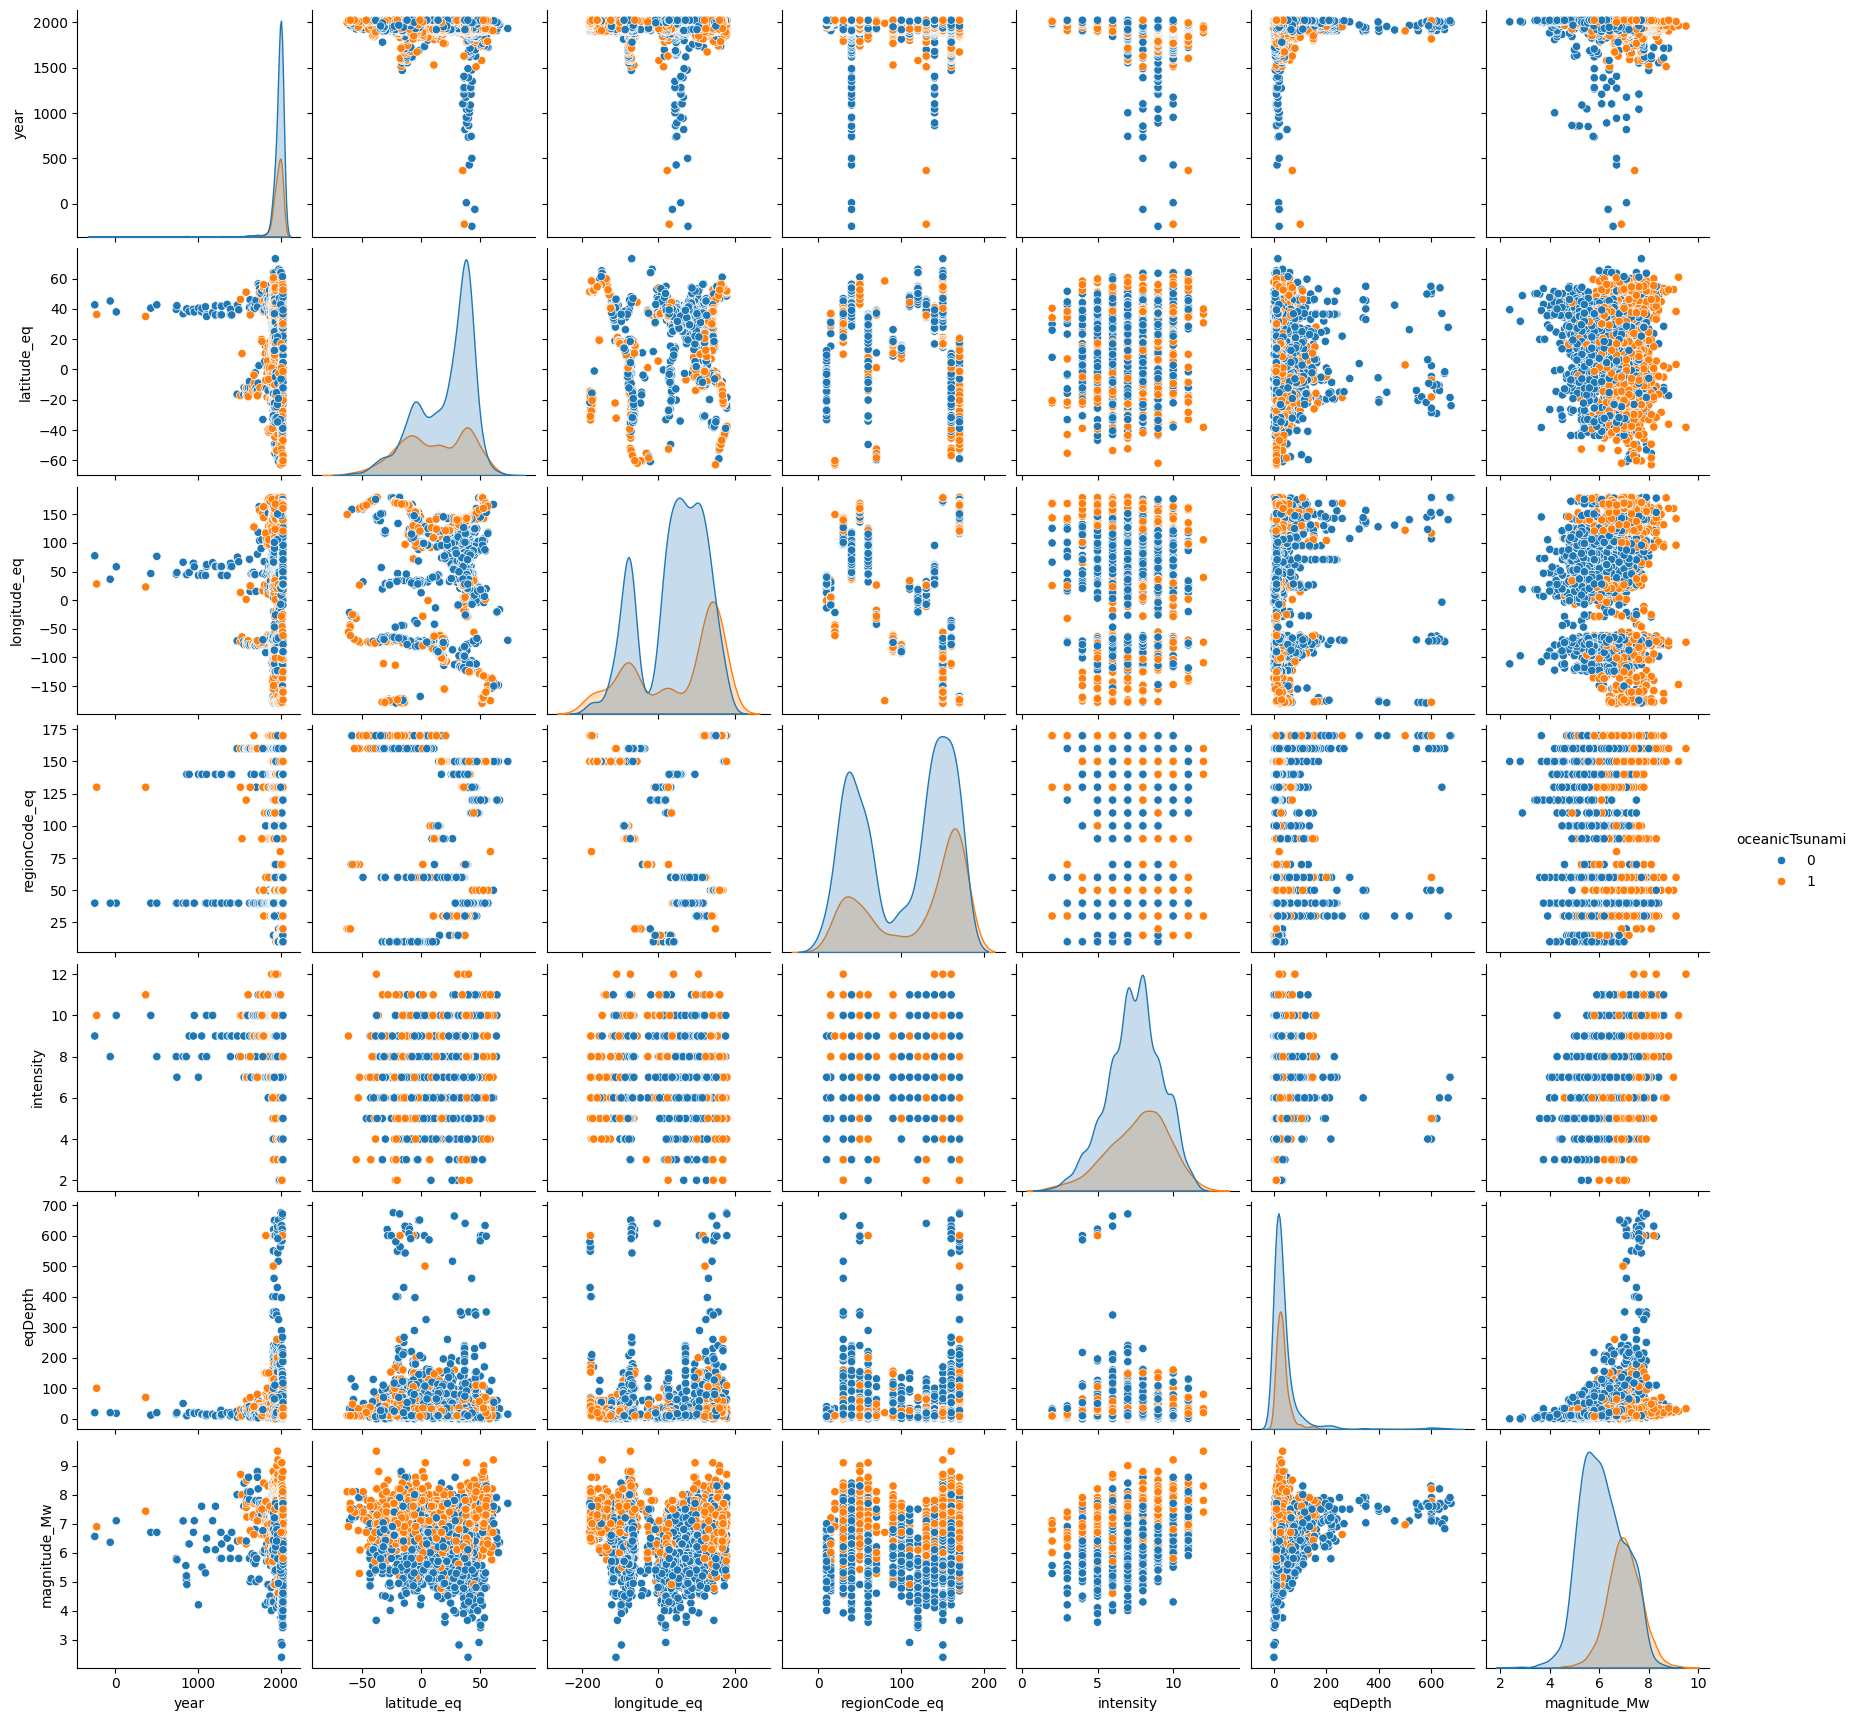

In [51]:
sns.pairplot(df,
            hue='oceanicTsunami')

<Axes: >

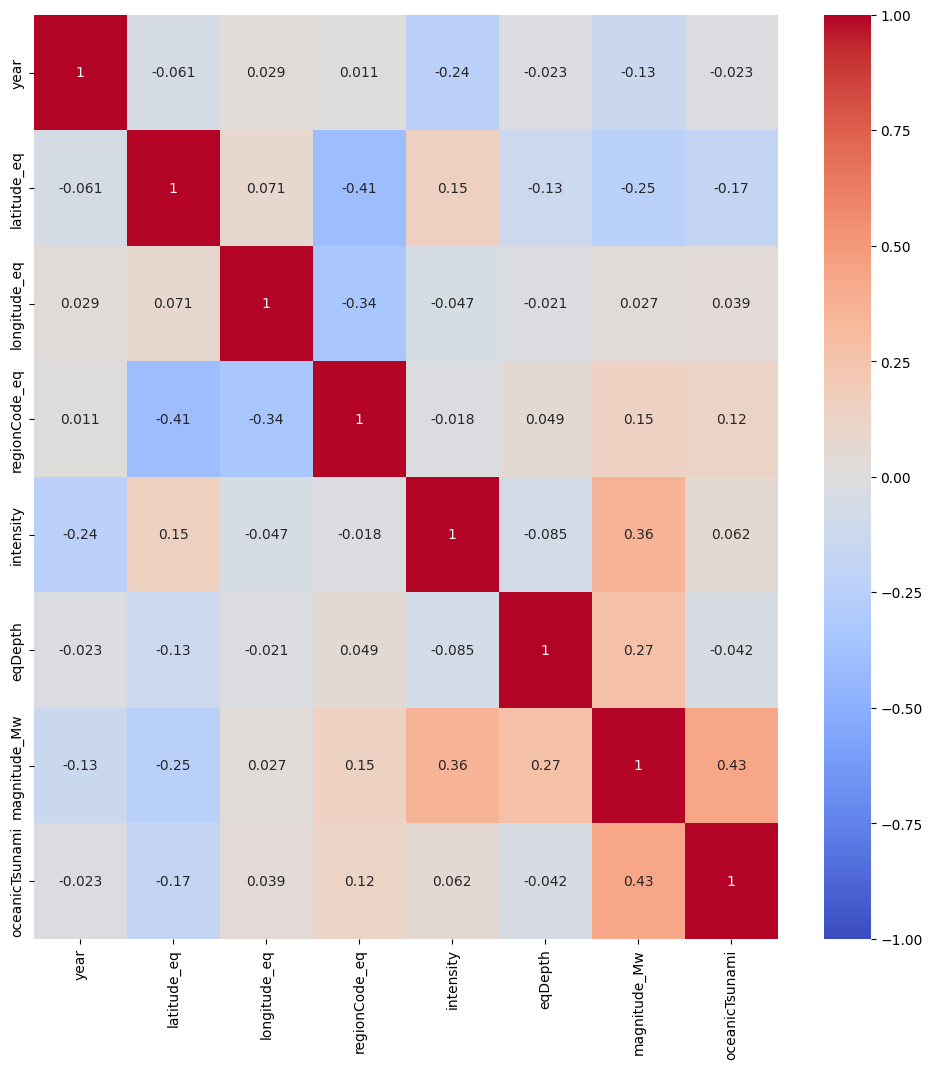

In [52]:
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(numeric_only= True), vmin= -1, cmap = 'coolwarm', annot=True)

## 2.- DIVIDIR DATASET EN TRAIN Y TEST

Vamos a dividir el dataset entre train y test y definimos nuestro target.

Nos guardamos los datasets para utilizarlos.

Voy a guardar el dataset tratado sin dividir para aplicarlo en la app streamlit

In [53]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['oceanicTsunami'])

print(df_train.shape)
print(df_test.shape)

(2811, 9)
(703, 9)


In [54]:
df_train.to_csv('train.csv', index=False)
df_test.to_csv('test.csv', index=False)

In [55]:
df.to_csv('demo.csv', index=False)

In [57]:
demo=pd.read_csv(r"C:\Users\isabe\Documents\Thebridge\Machine learning datasets\CARPETA GITHUB\Data\train_test\demo.csv")